In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


The dataset contains over **1014** entries and **7 columns** with no missing values

In [4]:
df = data.duplicated().sum()
df

562

In [5]:
print(f"The total number of duplicated rows in the dataset is {df}")

The total number of duplicated rows in the dataset is 562


In [6]:
data.loc[data.duplicated(), :]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


make copy od data with no duplicate

In [5]:
df_with_duplicate = data.copy()
df_with_duplicate.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


## EDA with duplicate values


In [63]:
def plot_distrbution(df,column, hue= None):
    fig, axes =plt.subplots(1,3, figsize=(20,5))
    sns.kdeplot(data=df, x=column , shade=True, ax=axes[0], hue=hue)
    if(hue):
        sns.boxplot(data=df, x=hue, ax=axes[1],y=column)
    else:
        sns.boxplot(data=df, x=column, ax=axes[1] )
    sns.histplot(data=df, x=column , ax=axes[2],hue=hue)
    plt.suptitle(f'Distribution of the {column}')

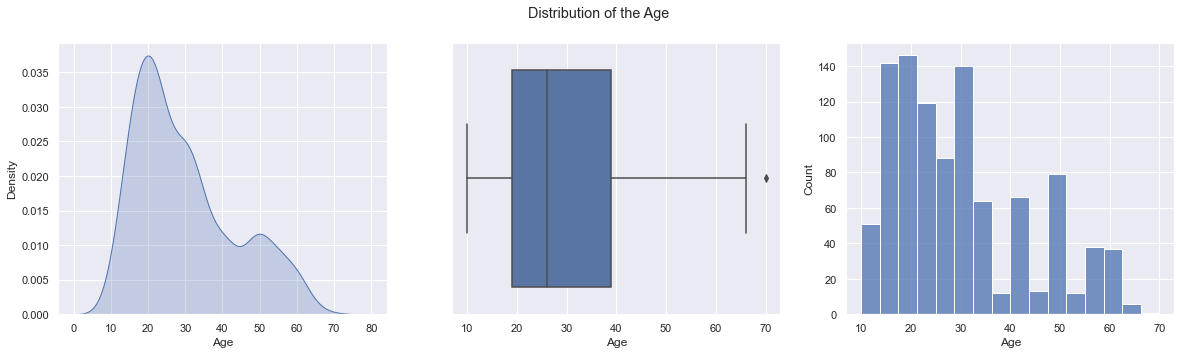

In [64]:
plot_distrbution(df=df_with_duplicate, column='Age')

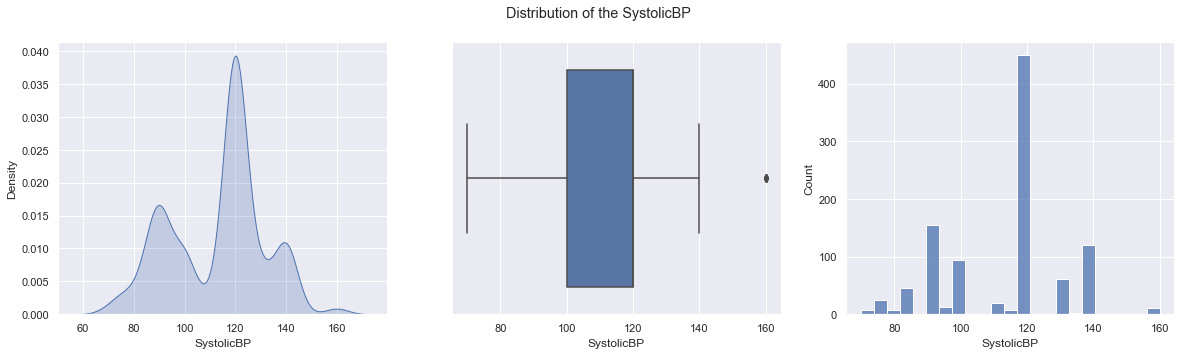

In [65]:
plot_distrbution(df=df_with_duplicate, column='SystolicBP')

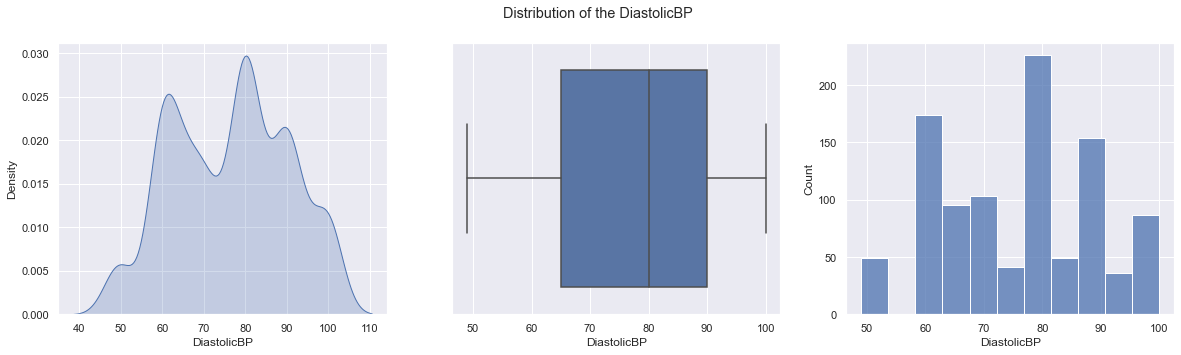

In [66]:
plot_distrbution(df=df_with_duplicate, column='DiastolicBP')

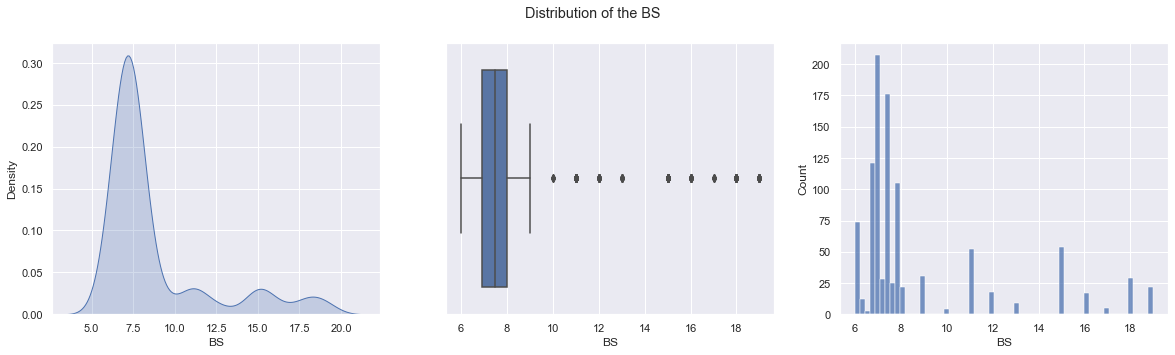

In [67]:
plot_distrbution(df=df_with_duplicate, column='BS')

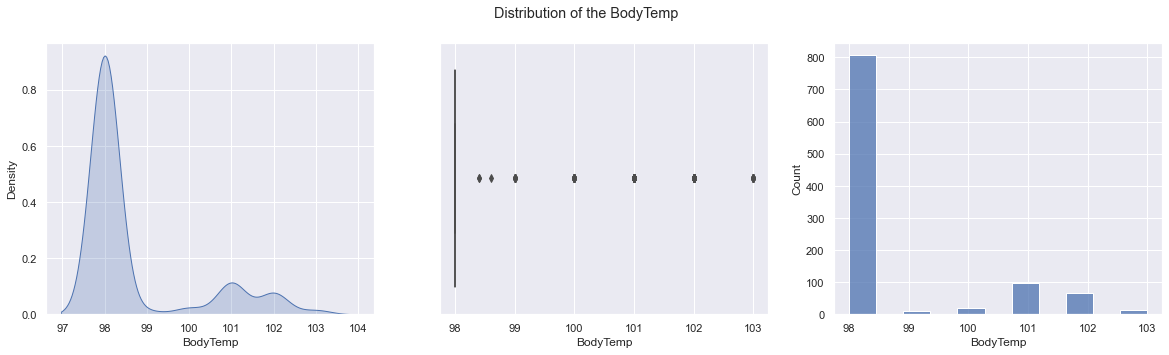

In [68]:
plot_distrbution(df=df_with_duplicate, column='BodyTemp')

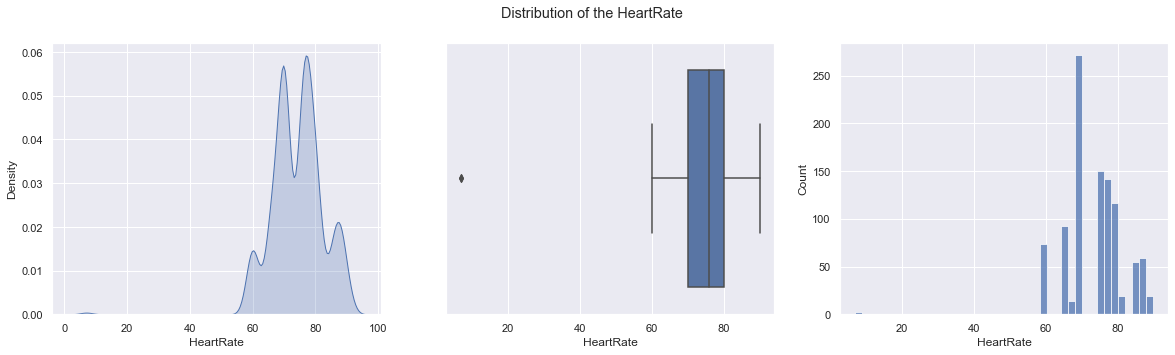

In [69]:
plot_distrbution(df=df_with_duplicate, column='HeartRate')

### Bivariate analysis with duplicate data

<AxesSubplot:>

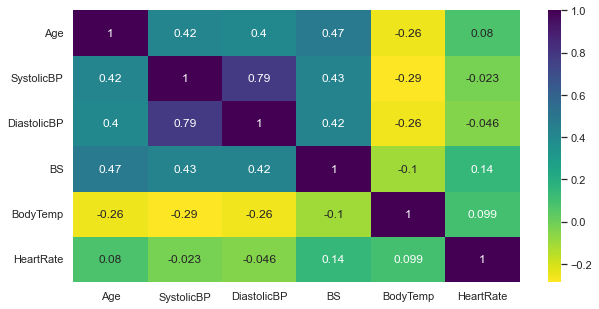

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(df_with_duplicate.corr(), annot=True, cmap='viridis_r')

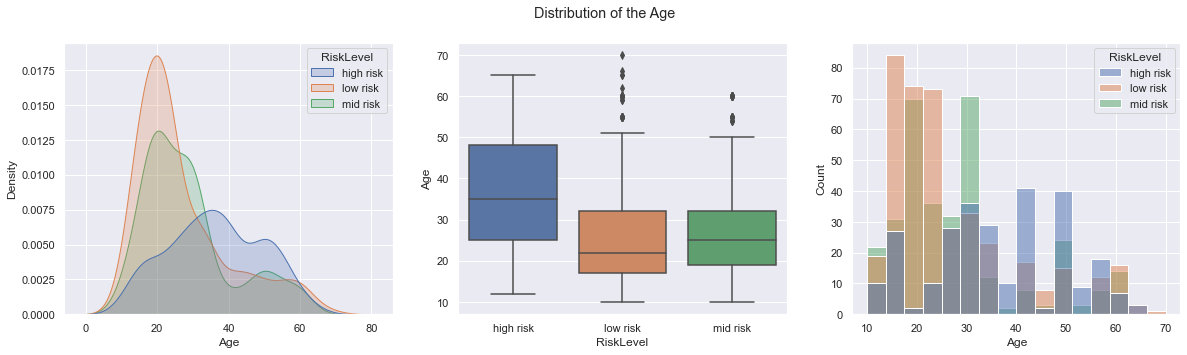

In [70]:
plot_distrbution(df=df_with_duplicate, column='Age', hue='RiskLevel')

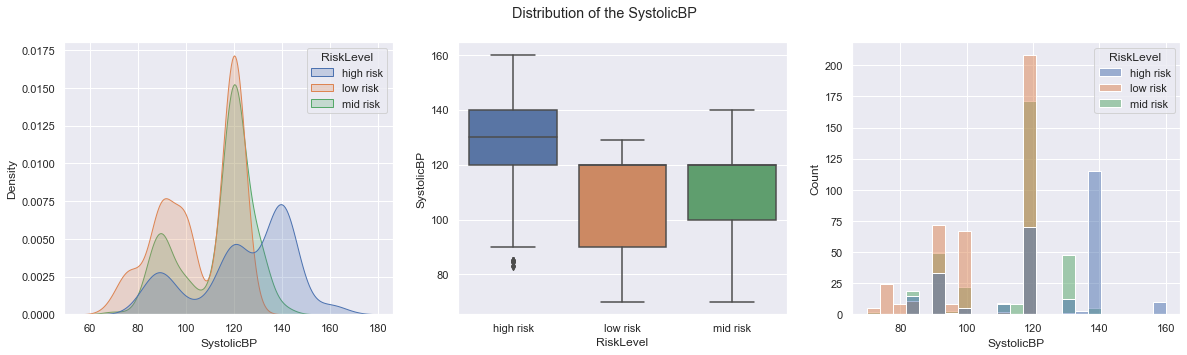

In [79]:
plot_distrbution(df=df_with_duplicate, column='SystolicBP', hue='RiskLevel')

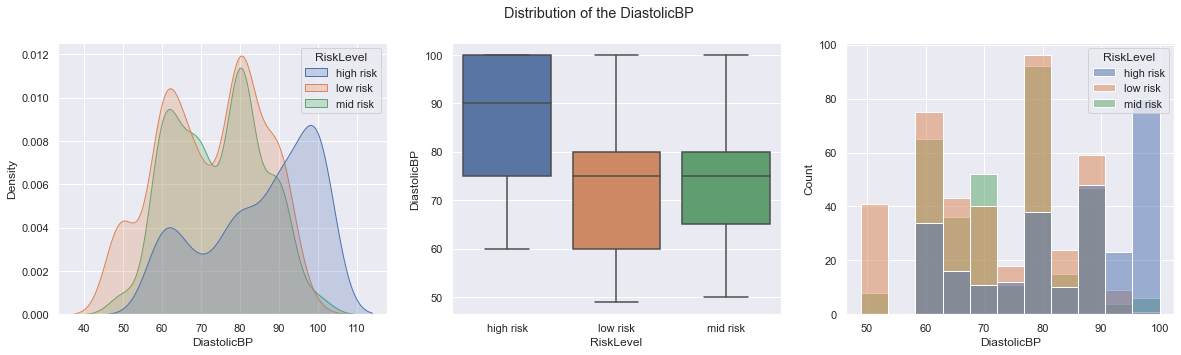

In [80]:
plot_distrbution(df=df_with_duplicate, column='DiastolicBP', hue='RiskLevel')

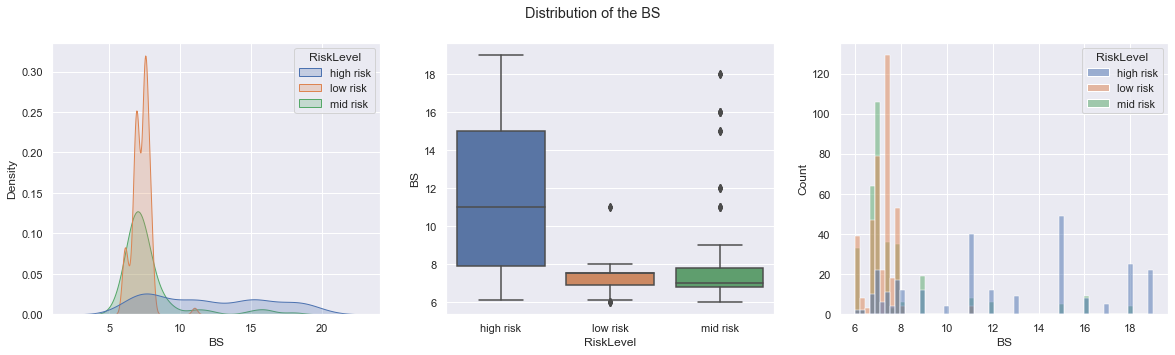

In [81]:
plot_distrbution(df=df_with_duplicate, column='BS', hue='RiskLevel')

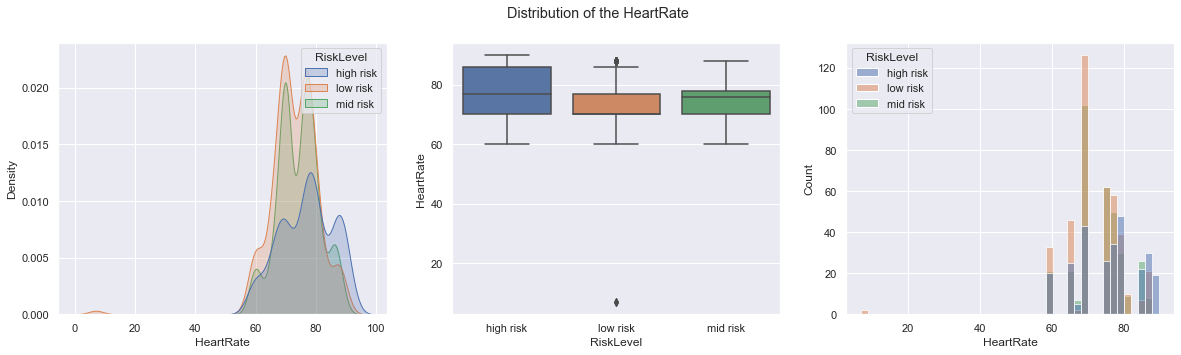

In [82]:
plot_distrbution(df=df_with_duplicate, column='HeartRate', hue='RiskLevel')

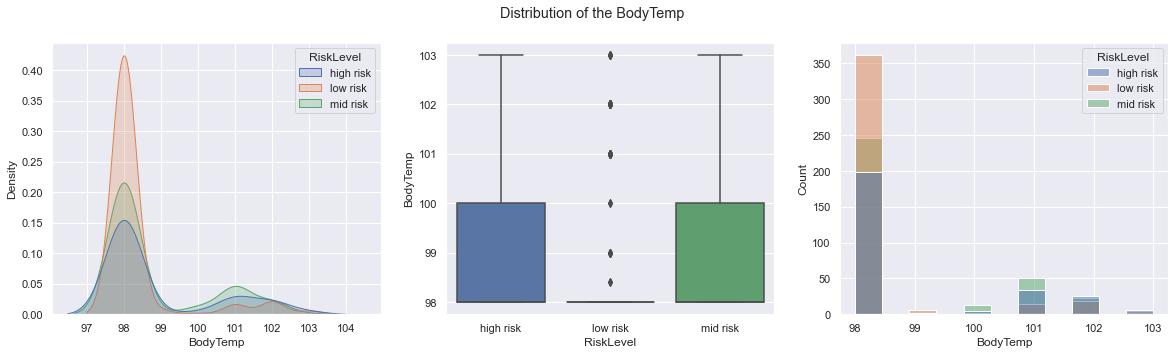

In [83]:
plot_distrbution(df=df_with_duplicate, column='BodyTemp', hue='RiskLevel')

<AxesSubplot:xlabel='Age', ylabel='SystolicBP'>

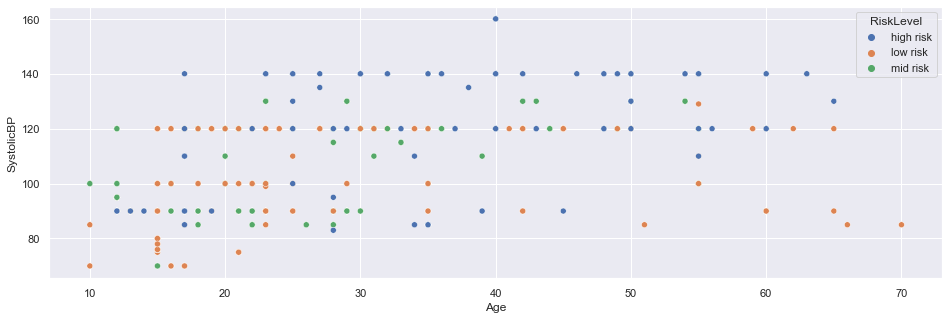

In [85]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_with_duplicate, x='Age', y='SystolicBP', hue='RiskLevel')

<AxesSubplot:xlabel='BS', ylabel='Age'>

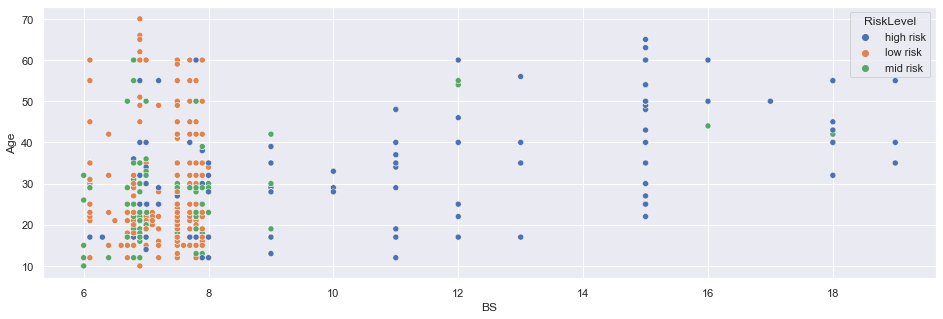

In [87]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_with_duplicate, x='BS', y='Age', hue='RiskLevel')

- The duplicates have the same 

In [7]:
data.drop_duplicates(inplace=True)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


# EDA

In [8]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


- The average age of the reported pregnant patient in the dataset is about **29 years**
- The youngest reported patient in the dataset is **10 years**
- The oldest patient in the dataset is **70 years of age**
- The highest reported blood sugar level in the dataset is **19mm0l/L**
- The lowest Diastolic blood pressure in the dataset is **49mmHg**
- The lowest reported heart rate in the dataset is **7beats/min**
- The average systolic blood pressure in the dataset is about **113mmHg**

## Demography

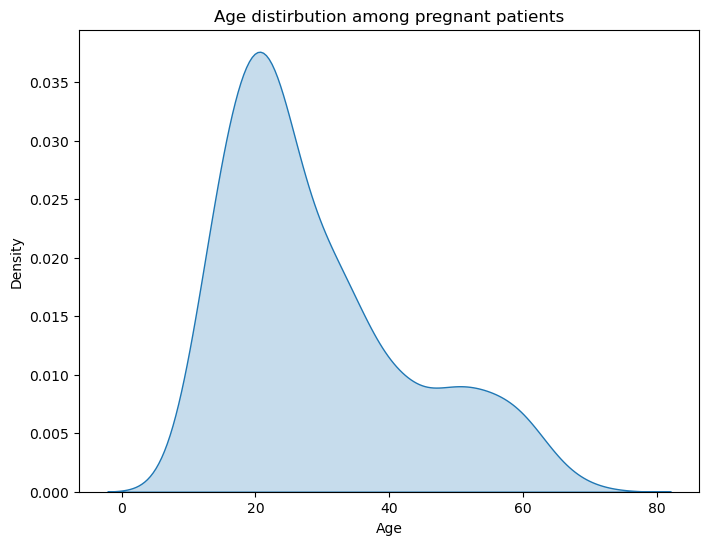

In [9]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['Age'], shade=True)
plt.title('Age distirbution among pregnant patients')
plt.show()

Most of the pregnant patients in the dataset are below their **forties**

# Age and Risk Level

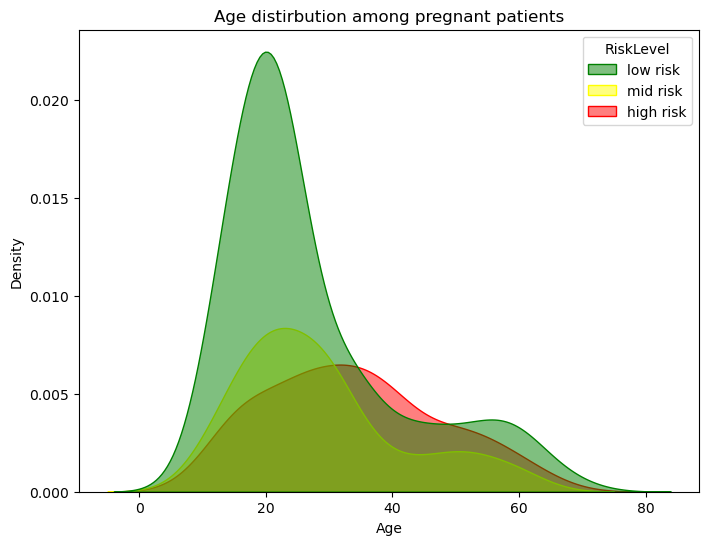

In [10]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='Age', shade=True, hue='RiskLevel', data = data, 
hue_order=['low risk','mid risk','high risk'], palette=['green','yellow','red'],alpha=.5)
plt.title('Age distirbution among pregnant patients')
plt.show()

The humps on the distribution signifies that age plays a factor in the risk level of maternal patients.**young** patients are more likely to experience **low and mid risk levels**, while **old patients** are prone to **high risk level**

# Risk Level

In [11]:
# Unique Values of RiskLevel (Target Variable)
data.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [12]:
# Frequency Counts of each RiskLevel Value
Risk_level = data.RiskLevel.value_counts()
Risk_level

low risk     234
high risk    112
mid risk     106
Name: RiskLevel, dtype: int64

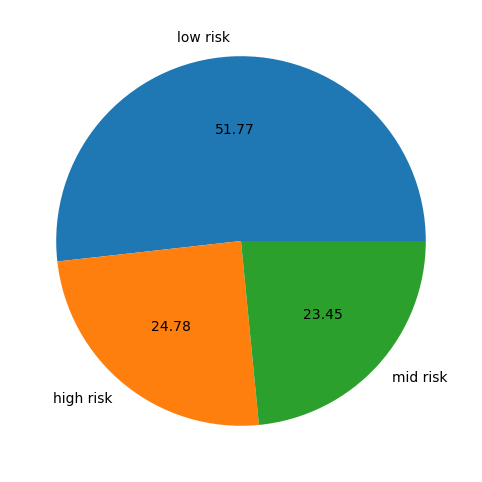

In [13]:
plt.figure(figsize=(8,6))
plt.pie(Risk_level.values, labels=Risk_level.index, autopct='%.2f')
plt.show()

Around **a quarter** of the pregnant patients in the dataset suffer high risk of health levels

# Age and Risk Level

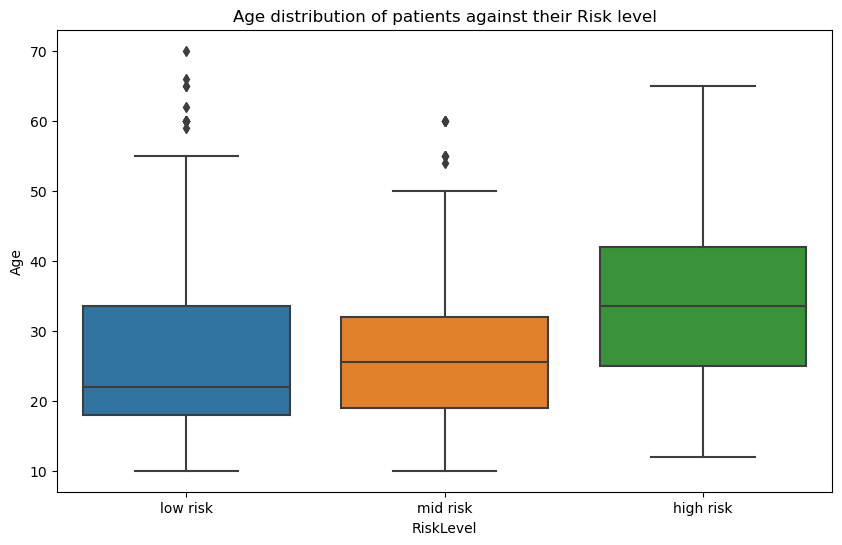

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='Age', data=data, order=['low risk', 'mid risk', 'high risk'])
plt.xlabel('RiskLevel')
plt.ylabel('Age')
plt.title('Age distribution of patients against their Risk level');

The boxplot shows a positive correlation between **age and risk level**.The older a patient, the higher their health risk level

# Diastolic BP and Risk Level

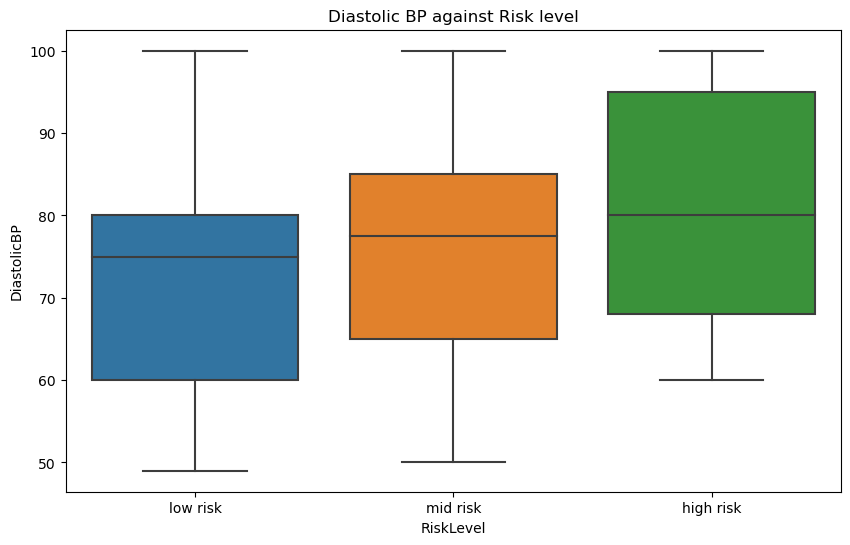

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=data, order=['low risk', 'mid risk', 'high risk'])
plt.title('Diastolic BP against Risk level');

A fairly positive correlation between diastolic blood pressure and risk level.Patients with low diastolic pressure are less likely to suffer health risk

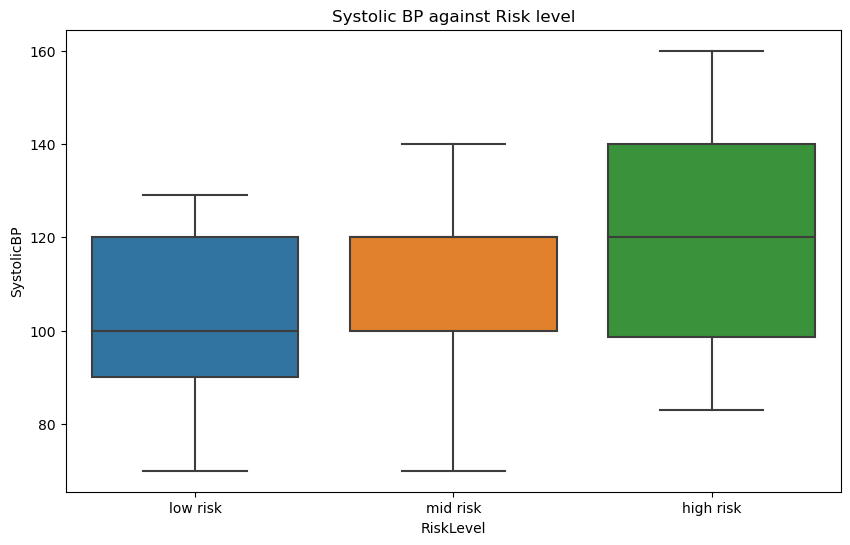

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='SystolicBP', data=data, order=['low risk', 'mid risk', 'high risk'])
plt.title('Systolic BP against Risk level');

A fairly positive correlation between systolic blood pressure and risk level.

# Blood Sugar Level against Risk level

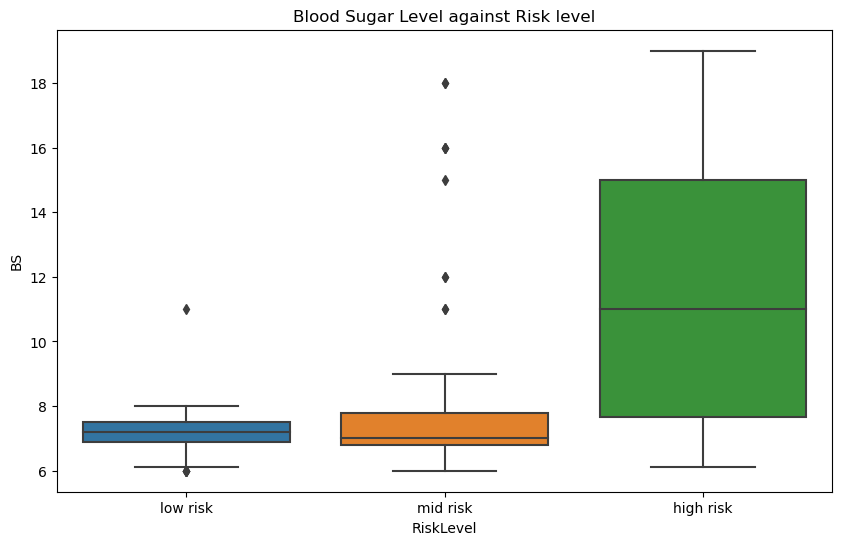

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='BS', data=data, order=['low risk', 'mid risk', 'high risk'])
plt.title('Blood Sugar Level against Risk level');

There seems to be relationship between blood sugar level and risk level.Patients with high blood sugar tends to be at high health risk

# Body Temperature against Risk level

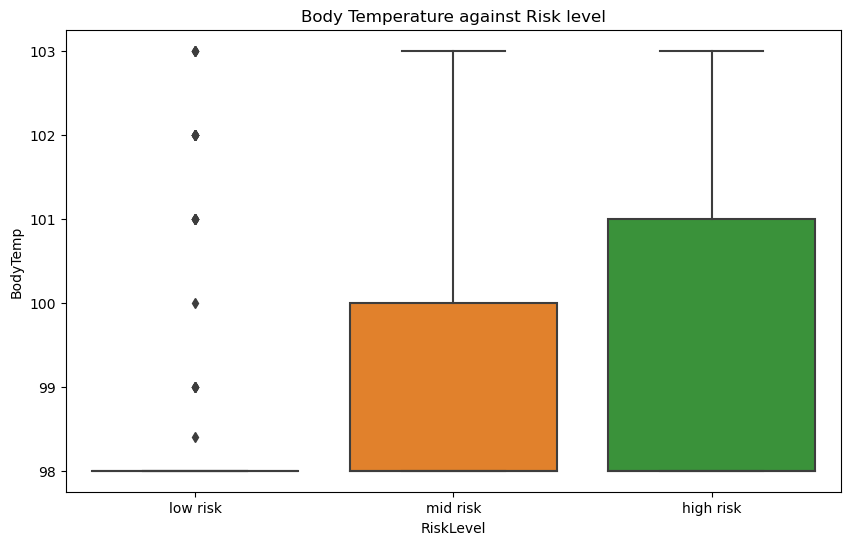

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='BodyTemp', data=data, order=['low risk', 'mid risk', 'high risk'])
plt.title('Body Temperature against Risk level');

There doesn't seem to be a strong relationship between **body temperature and risk level**, as we have low-temperature patients with high risk level and vice versa

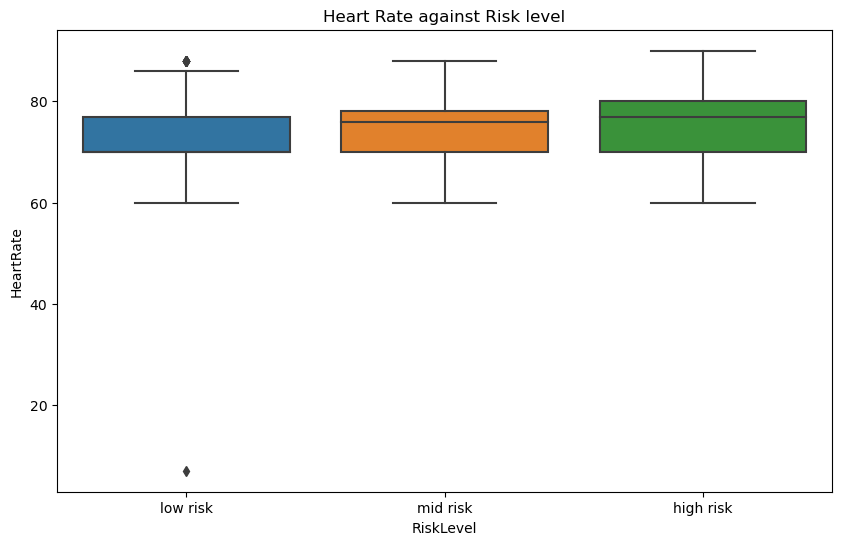

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RiskLevel', y='HeartRate', data=data, order=['low risk', 'mid risk', 'high risk'])
plt.title('Heart Rate against Risk level');

There's a slight correlation between heart rate and risk level